In [1]:
import pickle
import datetime
import requests
import pandas as pd
import numpy as np
import simpy
import random
from statistics import mean
import joblib
from scipy.stats import rv_continuous
import matplotlib.pyplot as plt
import seaborn
import statistics as stc

In [2]:
with open('monitoring_data_12mnth.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [3]:
dataset

,med_program_id,med_program_begin_date,med_program_end_date,complect_id,tonometry_number,gsm_module,sim_card,patient_id,male,birthday,...,subject_name,tonometry_data_id,tonometry_data_systolic_bp,tonometry_data_diastolic_bp,tonometry_data_heart_rate,tonometry_data_server_date,tonometry_data_server_time,tonometry_data_date,tonometry_data_time,server_respond
0,2857,2017-08-22,2027-10-18,2122.0,5.160301e+09,7.978953e+07,9.363334e+09,2932,жен,1965-03-09,...,Республика Саха (Якутия),1072988,123,93,94,2018-01-31,23:59:53.618,2018-01-31,23:59:53.616,OK
1,3192,2017-09-30,2027-09-28,2189.0,5.160300e+09,7.980329e+07,9.363336e+09,3286,жен,1960-05-18,...,Республика Саха (Якутия),1072987,131,70,71,2018-01-31,23:59:39.309,2018-01-31,23:59:39.307,OK
2,3192,2017-09-30,2027-09-28,2189.0,5.160300e+09,7.980329e+07,9.363336e+09,3286,жен,1960-05-18,...,Республика Саха (Якутия),1072986,138,78,83,2018-01-31,23:59:36.186,2018-01-31,23:59:36.184,OK
3,3192,2017-09-30,2027-09-28,2189.0,5.160300e+09,7.980329e+07,9.363336e+09,3286,жен,1960-05-18,...,Республика Саха (Якутия),1072985,146,82,90,2018-01-31,23:59:32.728,2018-01-31,23:59:32.726,OK
4,2500,2017-07-21,2027-10-18,2340.0,5.160301e+09,7.978982e+07,9.363336e+09,2520,жен,1971-03-31,...,Республика Саха (Якутия),1072984,124,84,74,2018-01-31,23:59:14.427,2018-01-31,23:59:14.426,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75508,7549,2018-05-16,2028-05-13,7656.0,5.171001e+09,3.591941e+14,8.970103e+16,8013,жен,1972-01-11,...,Сахалинская область,4125987,106,84,87,2018-12-01,00:01:25.645,2018-11-30,08:54:17.000,OK
75509,7549,2018-05-16,2028-05-13,7656.0,5.171001e+09,3.591941e+14,8.970103e+16,8013,жен,1972-01-11,...,Сахалинская область,4125986,127,72,147,2018-12-01,00:01:24.561,2018-11-30,08:52:52.000,OK
75510,7549,2018-05-16,2028-05-13,7656.0,5.171001e+09,3.591941e+14,8.970103e+16,8013,жен,1972-01-11,...,Сахалинская область,4125985,150,103,108,2018-12-01,00:01:23.507,2018-11-30,08:51:24.000,OK
75511,9016,2018-09-05,2028-09-04,7233.0,5.170503e+09,3.591941e+14,8.970103e+16,9492,жен,1972-04-17,...,Кемеровская область,4125984,146,92,67,2018-12-01,00:01:02.329,2018-12-01,00:01:02.327,OK


In [4]:
data = dataset.loc[dataset['birthday'] >= '1850-12-31']
error_data = dataset.loc[dataset['birthday'] <= '1850-12-31']

In [5]:
#Расчет возраста пациента
data['birthday'] = pd.to_datetime(data['birthday'])
NOW = datetime.datetime.now()
data['age'] = round((NOW-data['birthday'])/ np.timedelta64(1, 'Y'),0)

<ipython-input-5-d954c9ce0575>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['birthday'] = pd.to_datetime(data['birthday'])
<ipython-input-5-d954c9ce0575>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = round((NOW-data['birthday'])/ np.timedelta64(1, 'Y'),0)


In [6]:
#Список всех уникальных ID с корректной датой рождения
patnum = data['patient_id'].unique()

In [7]:
len(patnum)

7648

In [8]:
dsah = pd.read_csv('full_info_log_2018-2019.csv',',',index_col=['Unnamed: 0'],encoding='Windows-1251')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
dsah

,Код события,Название события,САД,ДАД,ЧСС,ID исполнителя,Роль исполнителя,Дата и время,ID пациента,Пол,Дата рождения,Регион,Область,ID комплекта,ID программы,Дата начала программы,Дата окончания программы
0,33000,Красная зона,71.0,46.0,81.0,3596,operator,2018-09-01 03:12:17,2873,жен,1951-03-13,Дальневосточный ФО,Республика Саха (Якутия),2217.0,2797,2017-08-15,2027-10-18
1,33001,Красная зона,71.0,46.0,81.0,4274,doctor_fd,2018-09-01 03:12:17,2873,жен,1951-03-13,Дальневосточный ФО,Республика Саха (Якутия),2217.0,2797,2017-08-15,2027-10-18
2,33000,Красная зона,181.0,125.0,98.0,3596,operator,2018-09-01 03:34:11,2836,жен,1967-06-08,Дальневосточный ФО,Республика Саха (Якутия),2396.0,2755,2017-08-10,2027-10-18
3,33001,Красная зона,181.0,125.0,98.0,821,doctor,2018-09-01 03:34:11,2836,жен,1967-06-08,Дальневосточный ФО,Республика Саха (Якутия),2396.0,2755,2017-08-10,2027-10-18
4,33000,Красная зона,195.0,70.0,60.0,3596,operator,2018-09-01 03:37:44,7364,жен,1931-11-10,Дальневосточный ФО,Республика Саха (Якутия),2279.0,6915,2018-04-20,2028-04-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641250,33011,Красная зона,220.0,95.0,79.0,6370,operator,2019-08-12 09:15:20,17011,жен,1959-06-16,Дальневосточный ФО,Республика Саха (Якутия),4952.0,16785,2019-05-17,2029-05-17
641251,33011,Красная зона,181.0,112.0,91.0,6370,operator,2019-08-12 09:16:55,10686,муж,1972-11-30,Северо-Западный ФО,Ленинградская область,8071.0,10128,2018-11-19,2028-11-19
641252,33003,Синяя зона,77.0,54.0,72.0,6370,operator,2019-08-12 09:19:35,19791,жен,1962-01-15,Сибирский ФО,Кемеровская область,11077.0,19695,2019-08-09,2029-08-09
641253,33003,Синяя зона,72.0,51.0,70.0,6370,operator,2019-08-12 09:39:20,19791,жен,1962-01-15,Сибирский ФО,Кемеровская область,11077.0,19695,2019-08-09,2029-08-09


In [10]:
ppp = dsah['ID пациента'].unique()
len(ppp)

13736

In [21]:
def meas_missing_ratio(series):
    return len(series.loc[series=='Отсутствие измерений'])/len(series)

miss_prob = dsah.groupby('ID пациента')['Название события'].agg(meas_missing_ratio)
miss_prob.head() # вероятности пропуска

ID пациента
3      0.000000
7      0.866667
56     0.000000
359    0.457143
470    0.000000
Name: Название события, dtype: float64

In [11]:
dsah = dsah.loc[dsah['Роль исполнителя'] == 'operator']

In [12]:
dsah = dsah.loc[(dsah['Название события'] != 'Отсутствие измерений') & (dsah['Название события'] != 'Возврат комплекта')
                & (dsah['Название события'] != 'Новая программа')]
dsah.head()

,Код события,Название события,САД,ДАД,ЧСС,ID исполнителя,Роль исполнителя,Дата и время,ID пациента,Пол,Дата рождения,Регион,Область,ID комплекта,ID программы,Дата начала программы,Дата окончания программы
0,33000,Красная зона,71.0,46.0,81.0,3596,operator,2018-09-01 03:12:17,2873,жен,1951-03-13,Дальневосточный ФО,Республика Саха (Якутия),2217.0,2797,2017-08-15,2027-10-18
2,33000,Красная зона,181.0,125.0,98.0,3596,operator,2018-09-01 03:34:11,2836,жен,1967-06-08,Дальневосточный ФО,Республика Саха (Якутия),2396.0,2755,2017-08-10,2027-10-18
4,33000,Красная зона,195.0,70.0,60.0,3596,operator,2018-09-01 03:37:44,7364,жен,1931-11-10,Дальневосточный ФО,Республика Саха (Якутия),2279.0,6915,2018-04-20,2028-04-17
6,33000,Красная зона,181.0,94.0,95.0,3596,operator,2018-09-01 03:52:51,9250,жен,1959-02-20,Дальневосточный ФО,Сахалинская область,NaN,8767,2018-08-16,2018-11-23
8,33000,Красная зона,157.0,133.0,94.0,3596,operator,2018-09-01 04:31:20,7426,жен,1941-01-12,Сибирский ФО,Республика Бурятия,NaN,7157,2018-04-27,2018-11-08


In [13]:
countlendata = {}
for i in ppp:
    countlendata[i] = len(dsah[dsah['ID пациента'] == i])
countlen = pd.DataFrame(countlendata.values())


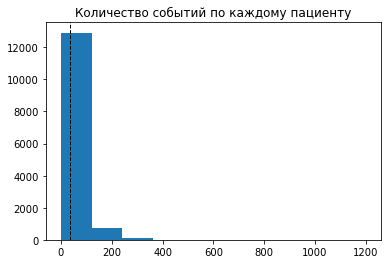

In [43]:
plt.title('Количество событий по каждому пациенту')
plt.hist(countlen)
plt.axvline(stc.median(countlendata.values()), color='k', linestyle='dashed', linewidth=1)

In [14]:
stc.median(countlendata.values())

1.0

In [15]:
len(ppp)

13736

In [16]:
m=0
for i in ppp:
    if (len(dsah[(dsah['ID пациента'] == i)]) >50) & (len(dsah[(dsah['ID пациента'] == i)]) <=55):
        m+=1
        
m

63

In [17]:
uniqid = dsah['ID пациента'].unique()

In [18]:
workid = []
for i in uniqid:
    if len(dsah[(dsah['ID пациента'] == i)]) >= 50:
        for j in patnum:
            if i == j:
                workid.append(i)
            else:
                pass

In [19]:
workid

[2873,
 7364,
 2612,
 7822,
 6632,
 9460,
 7490,
 6187,
 8432,
 4530,
 7799,
 1771,
 2383,
 2557,
 2610,
 2642,
 4068,
 4163,
 5278,
 5612,
 5672,
 5722,
 6008,
 6408,
 7619,
 7692,
 7409,
 8219,
 7574,
 7649,
 5841,
 9278,
 6140,
 1447,
 3352,
 8013,
 5182,
 5522,
 8046,
 2576,
 2660,
 2201,
 5376,
 8220,
 6337,
 7815,
 3679,
 3968,
 9133,
 4587,
 8246,
 2020,
 7444,
 8889,
 8287,
 2498,
 1107,
 1853,
 1886,
 2496,
 2737,
 2714,
 2985,
 3147,
 3963,
 4240,
 5650,
 5908,
 6788,
 5423,
 5993,
 7339,
 8087,
 7617,
 8092,
 3915,
 2712,
 2266,
 5963,
 8208,
 9366,
 1553,
 3204,
 3317,
 3412,
 3991,
 4048,
 4112,
 4190,
 4351,
 4461,
 4610,
 4997,
 6156,
 1782,
 6662,
 6080,
 8206,
 6214,
 7113,
 9478,
 1468,
 9226,
 7842,
 1190,
 1495,
 3041,
 3192,
 4703,
 4846,
 5973,
 6331,
 6981,
 7050,
 5299,
 7890,
 2597,
 7323,
 8533,
 8622,
 3487,
 3005,
 8779,
 5443,
 2492,
 1418,
 1490,
 1725,
 1977,
 2384,
 2749,
 3306,
 3779,
 3917,
 4239,
 4756,
 5513,
 6271,
 3040,
 3112,
 7238,
 8890,
 3034,

<AxesSubplot:title={'center':'Распределение показателей систолического \n давления для пациента id 2496'}, xlabel='Давление, мм.рт.ст', ylabel='Количество измерений'>

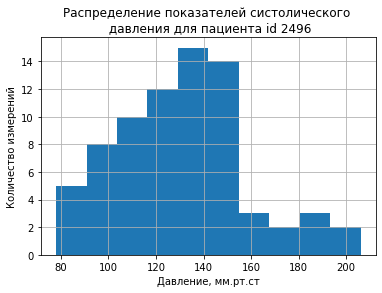

In [30]:
plt.title('Распределение показателей систолического \n давления для пациента id 2496')
plt.ylabel('Количество измерений')#('Давление, мм.рт.ст')
plt.xlabel('Давление, мм.рт.ст')#('Номер измерения')
dsah[dsah['ID пациента']==2496]['САД'].hist()

In [22]:
class rvData(rv_continuous):
    data = np.sort(np.random.rand(100))
    def __init__(self, initdata, *args):
        self.data = np.sort(initdata)
        super().__init__(args)
    def _cdf(self, x, *args):
        idx = int((self.data < x).sum())
        if idx == 0:
            return 0.0
        if idx >= len(self.data):
            return 1.0
        return (idx - 1.0 + (x - self.data[idx - 1]) / (self.data[idx] - self.data[idx - 1])) / len(
            self.data)

In [23]:
#Функция расчета ДАД от среднего значения по САД
def diast_ad_calc(sad, meanad):
    dad = 3*(meanad - 1/3*sad)/2
    return dad

In [24]:
#Функция расчета ЧСС
def max_chss_calc(male, age):
    if male == 'жен':
        max_chss = 206 - (0.88 * age) #Формула Марты Гулати для женщин
    elif male == 'муж':
        max_chss = 208 - (0.7 * age) #Формула Танака
    return max_chss


In [25]:
# Функция расчета средней реальной вариабельности давления (ARV)
def arv(true_press, pat_press):
    arv_val = 0
    arv_pat_val = []
    for i in range(1, len(true_press)):
        arv_val += abs(true_press[i][0] - true_press[i-1][0])
    arv_val += abs(true_press[-1][0] - pat_press[-1][0])
    arv_val = round(arv_val/len(true_press), 2)
    arv_pat_val += [arv_val]
    return arv_pat_val

In [26]:
df = data.loc[data['patient_id'].isin(workid)]

In [513]:
miss_prob = miss_prob.loc[miss_prob.index.isin(workid)]
miss_prob.head() # вероятности пропуск

ID пациента
1107    0.0
1190    0.0
1299    0.0
1418    0.0
1447    0.0
Name: Название события, dtype: float64

In [171]:
df

,med_program_id,med_program_begin_date,med_program_end_date,complect_id,tonometry_number,gsm_module,sim_card,patient_id,male,birthday,...,tonometry_data_diastolic_bp,tonometry_data_heart_rate,tonometry_data_server_date,tonometry_data_server_time,tonometry_data_date,tonometry_data_time,server_respond,age,mean_ad,perc_chss
76,2611,2017-07-25,2027-10-18,2327.0,5.160301e+09,7.972333e+07,9.363336e+09,2642,жен,1960-02-21,...,86,76,2018-01-31,23:11:40.936,2018-01-31,23:11:40.934,OK,61.0,103.333333,0.499
186,1835,2017-05-12,2027-10-18,1969.0,5.160301e+09,7.978138e+07,9.295836e+09,1772,жен,1951-11-08,...,74,69,2018-01-31,22:11:46.683,2018-01-31,22:11:46.681,OK,69.0,88.666667,0.453
195,1835,2017-05-12,2027-10-18,1969.0,5.160301e+09,7.978138e+07,9.295836e+09,1772,жен,1951-11-08,...,73,70,2018-01-31,22:09:28.072,2018-01-31,22:09:28.069,OK,69.0,90.333333,0.460
249,2276,2017-07-06,2027-10-18,2574.0,5.160300e+09,4.589773e+07,9.363336e+09,2236,жен,1939-05-13,...,78,65,2018-01-31,21:54:01.024,2018-01-31,21:54:01.022,OK,82.0,106.000000,0.427
254,2276,2017-07-06,2027-10-18,2574.0,5.160300e+09,4.589773e+07,9.363336e+09,2236,жен,1939-05-13,...,70,67,2018-01-31,21:52:24.879,2018-01-31,21:52:24.877,OK,82.0,101.000000,0.440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75500,7549,2018-05-16,2028-05-13,7656.0,5.171001e+09,3.591941e+14,8.970103e+16,8013,жен,1972-01-11,...,38,81,2018-12-01,00:03:23.450,2018-12-01,00:03:23.447,OK,49.0,43.000000,0.532
75507,7549,2018-05-16,2028-05-13,7656.0,5.171001e+09,3.591941e+14,8.970103e+16,8013,жен,1972-01-11,...,54,85,2018-12-01,00:01:26.729,2018-12-01,00:01:26.728,OK,49.0,68.000000,0.558
75508,7549,2018-05-16,2028-05-13,7656.0,5.171001e+09,3.591941e+14,8.970103e+16,8013,жен,1972-01-11,...,84,87,2018-12-01,00:01:25.645,2018-11-30,08:54:17.000,OK,49.0,91.333333,0.571
75509,7549,2018-05-16,2028-05-13,7656.0,5.171001e+09,3.591941e+14,8.970103e+16,8013,жен,1972-01-11,...,72,147,2018-12-01,00:01:24.561,2018-11-30,08:52:52.000,OK,49.0,90.333333,0.965


<AxesSubplot:title={'center':'Распределение доли ЧСС для пациента id 2496'}, xlabel='Доля к максимальному ЧСС', ylabel='Частота'>

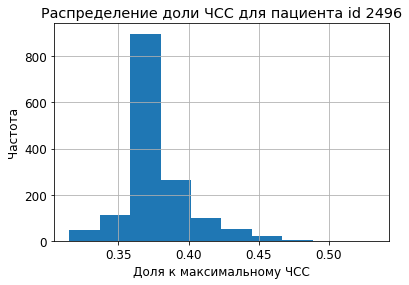

In [725]:
plt.title('Распределение доли ЧСС для пациента id 2496')
plt.ylabel('Частота')#('Давление, мм.рт.ст')
plt.xlabel('Доля к максимальному ЧСС')#('Номер измерения')
df[df['patient_id']==6337]['perc_chss'].hist()

In [27]:
#Расчет среднего артериального давления, ЧССмакс по всем пациентам
df['mean_ad'] = df[['tonometry_data_systolic_bp', 'tonometry_data_diastolic_bp']].apply(
    lambda x:(x['tonometry_data_systolic_bp']*1/3 + x['tonometry_data_diastolic_bp']*2/3) , axis=1)
df['perc_chss'] = round(df['tonometry_data_heart_rate']/ max_chss_calc(df['male'].values[0], df['age'].values[0]), 3)

<ipython-input-27-06758cd0bd6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_ad'] = df[['tonometry_data_systolic_bp', 'tonometry_data_diastolic_bp']].apply(
<ipython-input-27-06758cd0bd6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['perc_chss'] = round(df['tonometry_data_heart_rate']/ max_chss_calc(df['male'].values[0], df['age'].values[0]), 3)


In [34]:
partRZ = {}
for i in workid:
    partRZ[i] = len(dsah[(dsah['ID пациента'] == i) & ((dsah['Название события'] == 'Красная зона') | 
                                   (dsah['Название события'] == 'Красная зона (Отсутствует контрольное измерение)') |
                                  (dsah['Название события'] == 'Красная зона (ХСН)'))])\
                / len(dsah[dsah['ID пациента'] == i])
RZ = pd.DataFrame(partRZ.values())


In [44]:
f = RZ[RZ>0.8]
f.mean()

0    0.983878
dtype: float64

In [29]:
stc.median(partRZ.values())

0.8181818181818182

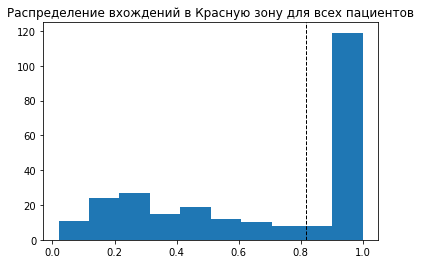

In [650]:
plt.title('Distribution of red zones for patients')
plt.hist(RZ)
plt.axvline(stc.median(partRZ.values()), color='k', linestyle='dashed', linewidth=1)

In [260]:
ctrlAH = []
unctrlAH = []
for i in partRZ:
    if partRZ[i]<= 0.8:
        ctrlAH.append(i)
    elif partRZ[i]> 0.8:
        unctrlAH.append(i)

In [264]:
ctrlAH

[2873,
 2612,
 6632,
 6187,
 1771,
 2557,
 2610,
 4068,
 4163,
 5278,
 5612,
 5672,
 5722,
 6008,
 6408,
 7619,
 7692,
 1447,
 8013,
 5522,
 8046,
 8889,
 1853,
 1886,
 2496,
 2714,
 2985,
 3147,
 4240,
 5650,
 5908,
 6788,
 8087,
 8208,
 9366,
 1553,
 3204,
 3317,
 3412,
 3991,
 4048,
 4112,
 4190,
 4351,
 4461,
 4610,
 4997,
 6156,
 6080,
 8206,
 1190,
 1495,
 3192,
 4846,
 5973,
 6331,
 6981,
 7050,
 2597,
 3487,
 3005,
 2492,
 1418,
 1725,
 1977,
 2749,
 3779,
 4239,
 4756,
 5513,
 6271,
 3040,
 8890,
 3034,
 2034,
 2265,
 3157,
 4759,
 5141,
 5190,
 5578,
 5596,
 6153,
 3740,
 1862,
 2369,
 2397,
 2593,
 3162,
 3215,
 3458,
 5268,
 5631,
 5954,
 6195,
 7162,
 1772,
 3170,
 4185,
 1754,
 7848,
 8775,
 3455,
 4038,
 3304,
 4956,
 7697,
 9202,
 5626,
 5445,
 9558,
 1299,
 8352,
 3294,
 2261,
 3960,
 9734,
 2859,
 4922,
 6065,
 6225,
 5536,
 10229,
 9703,
 10423,
 2443]

In [514]:
def make_generator(array):
    for i in range(len(array)):
        yield array[i]

gen = make_generator([1 if rd_val < 0.1 else 0 for rd_val in np.random.uniform(0, 1, 2*30)])
next(gen)

0

In [250]:
def modeling_patient(id_pat):
    df_patient = df[df['patient_id'] == id_pat]
    male = df_patient['male'].values[0]
    age = df_patient['age'].values[0]
    meansad = df_patient['tonometry_data_systolic_bp'].mean()
    sadvar = df_patient['tonometry_data_systolic_bp'].values

    
    sad = rvData(df_patient['tonometry_data_systolic_bp'])
    meanad = rvData(df_patient['mean_ad'])
    perc_chss = rvData(df_patient['perc_chss'])
    
    #Запись данных сгенерированного давления
    pat_press = [] 
    #Запись данных ошибочных измерений
    err = [] 
    err_old_rule =[]
    err_mean = []
    
    morning_time=10 #Время утреннего замера давления
    evening_time=20 #Время вечернего замера давления

    #Массив корректных значений давления пациента
    true_press = []
    true_press_old_rule = []
    true_press_mean = []
    #Запись данных ARV
    arv_pat = []
    #Количество дней
    days = 30
    N = 5

    # какие измерения будут пропущены: 1 - пропуск, 0 - нет
#     missing_meas_flags = [1 if rd_val < missing_prob else 0 for rd_val in np.random.uniform(0, 1, 2*days)]
#     gen = make_generator(missing_meas_flags)
    
    #Начало моделирования
    env = simpy.Environment()
    class Patient:
        def __init__(self, env):
            self.env = env
            self.take_measure = env.event()
            self.pat_answ = [env.process(self.patients())]
            self.time_proc = env.process(self.timemeasure())
            self.pat_error = [env.process(self.error_message())]
            self.measure_done = env.event()
        

        def timemeasure(self):
            while True:
                self.take_measure.succeed()
                self.take_measure = self.env.event()
                yield self.env.timeout(24)

        def patients(self):
            while True:
                yield self.take_measure
                yield self.env.timeout(morning_time)
                syst_ad = sad.rvs()
                dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                while dias_ad >= syst_ad:
                    dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                if not next(gen): # !!! добавила
                    pat_press.append([int(syst_ad),int(dias_ad), int(max_chss_calc(male, age)*perc_chss.rvs())])
                self.measure_done.succeed()
                self.measure_done = self.env.event()

                yield self.env.timeout(evening_time-morning_time)
                syst_ad = sad.rvs()
                dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                while dias_ad >= syst_ad:
                    dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                if not next(gen): # !!! добавила
                    pat_press.append([int(syst_ad),int(dias_ad), int(max_chss_calc(male, age)*perc_chss.rvs())])
                self.measure_done.succeed()
                self.measure_done = self.env.event()

        def error_message(self):
#             global pat_press, true_press, true_press_old_rule,true_press_mean,\
#             err,err_old_rule,err_mean, arv_pat
            while True:
                yield self.measure_done
                if len(len_pat_press) != len(pat_press): # сгенерировано новое измерение !!!!
                        for i in range(len(pat_press)-len(len_pat_press)):
                            len_pat_press.append(1) # !!! сравняем длину массивов
 # Проверка по правилу на основе ВАД               
                # Получение первого измерения
                if len(pat_press) <= N :
                    true_press.append(pat_press[-1])
                    arv_pat.append(arv(true_press, pat_press)[-1])
                    err.append(0)
                # проверяю вхождения в доверительный интервал
                elif (abs(pat_press[-1][0] - true_press[-1][0]) <= (arv_pat[-1] + 3*((np.var(arv_pat))**(1/2)))):
                    arv_pat.append(arv(true_press, pat_press)[-1])
                    true_press.append(pat_press[-1])
                    err.append(0)
                else: 
                    err.append(1)
 # Проверка на основе среднего значения давления
                if len(pat_press) <= N :
                    true_press_mean.append(pat_press[-1])
                    err_mean.append(0)
                elif (abs(pat_press[-1][0] - meansad) <= 2*(np.var(sadvar)**(1/2))):
                    true_press_mean.append(pat_press[-1])
                    err_mean.append(0)
                else: 
                    err_mean.append(1)                                 
                    
 # Проверка на основе жестких правил
                if (pat_press[-1][0] <= 135) and (pat_press[-1][0] >= 110):
                    true_press_old_rule.append(pat_press[-1])
                    err_old_rule.append(0)
                else: 
                    err_old_rule.append(1)
    pats = Patient(env)
    env.run(days*24)
    env.now

    return err, err_old_rule, err_mean

In [254]:
import time
res4068 = []
start_time = time.time()
res = joblib.Parallel(n_jobs=6)(
                    joblib.delayed(modeling_patient)(4068)
                    for i_run in range(100))

print("--- %s seconds ---" % (time.time() - start_time))
res4068.extend(res)

--- 22.304640293121338 seconds ---


In [285]:
def modeling(list_pat):
    result = []
    for i in list_pat:
        result.append(modeling_patient(i))
    return result

In [286]:
res_ctrl = []
start_time = time.time()
res1 = joblib.Parallel(n_jobs=-1)(
                    joblib.delayed(modeling)(ctrlAH)
                    for i_run in range(100))

print("--- %s seconds ---" % (time.time() - start_time))
res_ctrl.extend(res1)

--- 1860.324325799942 seconds ---


In [287]:
res_unctrl = []
start_time = time.time()
res2 = joblib.Parallel(n_jobs=-1)(
                    joblib.delayed(modeling)(unctrlAH)
                    for i_run in range(100))

print("--- %s seconds ---" % (time.time() - start_time))
res_unctrl.extend(res2)

--- 1855.5541818141937 seconds ---


In [305]:
sum(res_ctrl[0][0][0])/len(res_ctrl[0][0][0])

0.25

In [313]:
for i in res_ctrl[0][0]:
    print(sum(i))

15
30
2


In [450]:
sum_ctrl = []
for i in res_ctrl: # перебираем по 100 запускам
    ARV_load = 0
    Base_load = 0
    Mean_load = 0  
    ARV = 0
    Base = 0
    Mean = 0
    sumlen = 0
    for j in i: # перебираем по 126 пациентам
        ARV += sum(j[0])
        Base += sum(j[1])
        Mean += sum(j[2])
        sumlen += len(j[0])
    ARV_load += ARV/sumlen
    Base_load += Base/sumlen
    Mean_load += Mean/sumlen
    sum_ctrl.append([ARV_load,Base_load,Mean_load])
sum_ctrl

[[0.30357142857142855, 0.589021164021164, 0.039153439153439155],
 [0.28214285714285714, 0.5787037037037037, 0.04272486772486773],
 [0.2921957671957672, 0.5728835978835979, 0.036243386243386244],
 [0.26402116402116405, 0.5743386243386244, 0.03981481481481482],
 [0.305952380952381, 0.5943121693121693, 0.038492063492063494],
 [0.26521164021164023, 0.5784391534391534, 0.038624338624338624],
 [0.30674603174603177, 0.575, 0.037698412698412696],
 [0.2863756613756614, 0.5884920634920635, 0.03941798941798942],
 [0.2568783068783069, 0.5830687830687831, 0.036904761904761905],
 [0.2728835978835979, 0.5765873015873015, 0.0380952380952381],
 [0.2384920634920635, 0.5791005291005291, 0.034656084656084656],
 [0.2441798941798942, 0.5874338624338624, 0.03518518518518519],
 [0.26521164021164023, 0.5776455026455026, 0.03835978835978836],
 [0.26904761904761904, 0.5810846560846561, 0.03822751322751323],
 [0.29708994708994707, 0.5752645502645503, 0.036904761904761905],
 [0.28624338624338624, 0.582671957671957

In [449]:
sum_unctrl = []

for i in res_unctrl: # перебираем по 100 запускам
    ARV_load = 0
    Base_load = 0
    Mean_load = 0  
    ARV = 0
    Base = 0
    Mean = 0
    sumlen = 0
    for j in i: # перебираем по 126 пациентам
        ARV += sum(j[0])
        Base += sum(j[1])
        Mean += sum(j[2])
        sumlen +=len(j[0])
    ARV_load += ARV/sumlen
    Base_load += Base/sumlen
    Mean_load += Mean/sumlen
    sum_unctrl.append([ARV_load,Base_load,Mean_load]) 
    
sum_unctrl

[[0.3, 0.8372703412073491, 0.03818897637795276],
 [0.289501312335958, 0.8380577427821523, 0.03884514435695538],
 [0.28136482939632546, 0.8312335958005249, 0.04212598425196851],
 [0.28858267716535435, 0.8408136482939632, 0.043700787401574806],
 [0.30196850393700786, 0.8362204724409449, 0.04081364829396326],
 [0.294750656167979, 0.829265091863517, 0.03687664041994751],
 [0.29566929133858266, 0.8354330708661417, 0.03884514435695538],
 [0.27165354330708663, 0.833989501312336, 0.03674540682414698],
 [0.287007874015748, 0.8311023622047244, 0.043438320209973756],
 [0.2681102362204724, 0.8309711286089239, 0.03976377952755906],
 [0.28136482939632546, 0.8387139107611549, 0.04409448818897638],
 [0.2615485564304462, 0.8308398950131234, 0.03963254593175853],
 [0.28307086614173227, 0.8330708661417323, 0.03713910761154856],
 [0.29553805774278213, 0.8377952755905512, 0.04186351706036746],
 [0.27808398950131236, 0.8328083989501313, 0.04199475065616798],
 [0.27125984251968505, 0.8391076115485564, 0.0385

In [452]:
ctrl_ARV = []
ctrl_Base = []
ctrl_Mean = []

for i in sum_ctrl:
    ctrl_ARV.append(i[0])
    ctrl_Base.append(i[1])
    ctrl_Mean.append(i[2])
    
unctrl_ARV = []
unctrl_Base = []
unctrl_Mean = []

for i in sum_unctrl:
    unctrl_ARV.append(i[0])
    unctrl_Base.append(i[1])
    unctrl_Mean.append(i[2])
    

(array([ 1.,  2.,  5., 10., 26., 23., 17.,  8.,  6.,  2.]),
 array([0.03187831, 0.03321429, 0.03455026, 0.03588624, 0.03722222,
        0.0385582 , 0.03989418, 0.04123016, 0.04256614, 0.04390212,
        0.0452381 ]),
 <BarContainer object of 10 artists>)

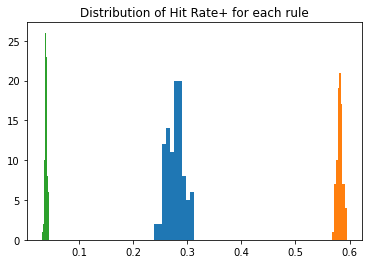

In [472]:
#plt.figure(figsize=(8,5), dpi= 80) 
plt.title('Distribution of Hit Rate+ for each rule')
plt.hist(ctrl_ARV, label = 'ARV-based')
plt.hist(ctrl_Base, label = 'Base')
plt.hist(ctrl_Mean, label = 'Mean-based')



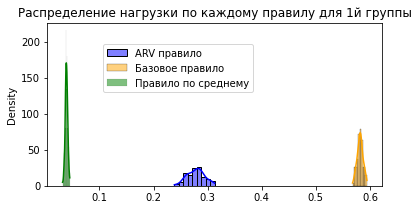

In [649]:
plt.figure(figsize=(6,3))
plt.title('Distribution of Hit Rate+ for each rule for 1st group')
seaborn.histplot(ctrl_ARV, color = 'b',kde=True, label = 'ARV-based',stat="density" )
seaborn.histplot(ctrl_Base, color = 'orange',kde=True, label = 'Base',stat="density" )
seaborn.histplot(ctrl_Mean, color = 'g',kde=True, label = 'Mean-based',stat="density" )
plt.legend(bbox_to_anchor = [0.15, 0.9])
# seaborn.histplot(unctrl_ARV, color = 'b')
# seaborn.histplot(unctrl_Base, color = 'orange')
# seaborn.histplot(unctrl_Mean, color = 'g')

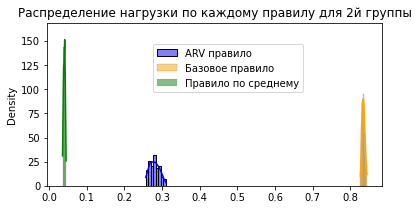

In [648]:
plt.figure(figsize=(6,3))
plt.title('Distribution of Hit Rate+ for each rule for 2nd group')
seaborn.histplot(unctrl_ARV, color = 'b',kde=True, label = 'ARV-based',stat="density" )
seaborn.histplot(unctrl_Base, color = 'orange',kde=True, label = 'Base',stat="density" )
seaborn.histplot(unctrl_Mean, color = 'g',kde=True, label = 'Mean-based',stat="density" )
plt.legend(bbox_to_anchor = [0.5, 0.9])

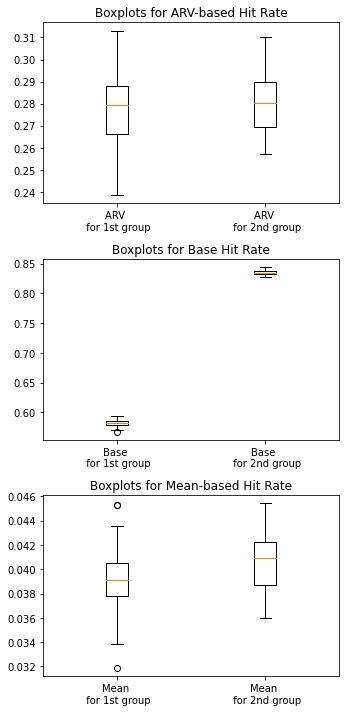

In [454]:
plt.figure(figsize=(5,10))
plt.subplot(3, 1, 1)
plt.title('Boxplots for ARV-based Hit Rate')
# plt.ylabel('Pressure, mmHg')#('Давление, мм.рт.ст')
# plt.xlabel('Measurement number')#('Номер измерения')
plt.boxplot([ctrl_ARV,unctrl_ARV], labels=['ARV \n for 1st group','ARV \n for 2nd group'])

plt.subplot(3, 1, 2)
plt.title('Boxplots for Base Hit Rate')
# plt.ylabel('Pressure, mmHg')#('Давление, мм.рт.ст')
# plt.xlabel('Measurement number')#('Номер измерения')
plt.boxplot([ctrl_Base,unctrl_Base], labels=['Base \n for 1st group','Base \n for 2nd group'])

plt.subplot(3, 1, 3)
plt.title('Boxplots for Mean-based Hit Rate')
# plt.ylabel('Pressure, mmHg')#('Давление, мм.рт.ст')
# plt.xlabel('Measurement number')#('Номер измерения')
plt.boxplot([ctrl_Mean,unctrl_Mean], labels=['Mean \n for 1st group','Mean \n for 2nd group'])


plt.tight_layout()
plt.show()

In [567]:
HR_ctrl = []

ARV = []
Base = []
Mean = []


for j in res_ctrl[0]: # перебираем по 126 пациентам 1 раз
    ARV.append(sum(j[0])/len(j[0])) #Массив HR+ для ARV
    Base.append(sum(j[1])/len(j[1])) #Массив HR+ для Base
    Mean.append(sum(j[2])/len(j[2]))


In [676]:
1-(mean(Mean)/mean(Base))

0.9335279586795419

Text(0.5, 1.0, 'System load of ARV-based and Base rules')

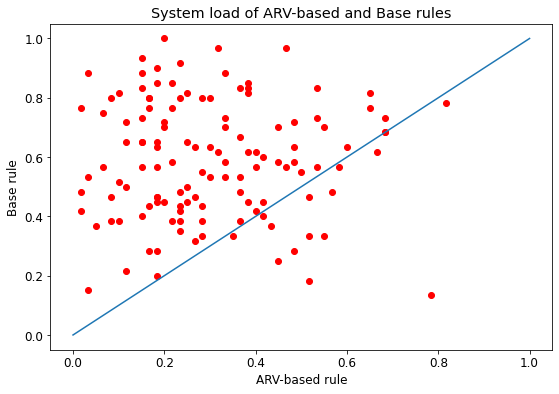

In [699]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(9,6))
plt.plot(ARV, Base, 'ro' )
plt.plot([0,1],[0,1])
plt.xlabel('ARV-based rule')
plt.ylabel('Base rule')
plt.title('System load of ARV-based and Base rules')

Text(0.5, 1.0, 'System load of Mean-based and Base rules')

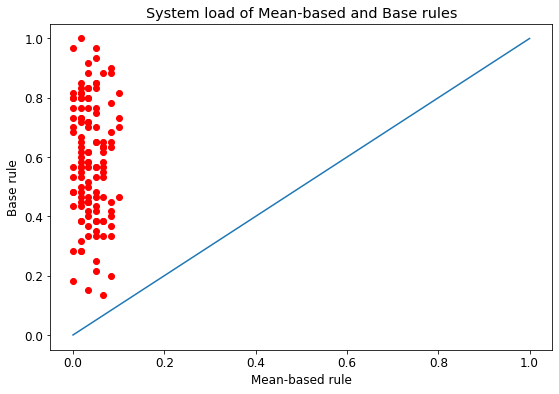

In [698]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(9,6))

plt.plot(Mean, Base, 'ro' )
plt.plot([0,1],[0,1])
plt.xlabel('Mean-based rule')
plt.ylabel('Base rule')
plt.title('System load of Mean-based and Base rules')

In [525]:
# МЕНЯЕМ ДЛЯ БАЗОВОГО ПРАВИЛА ДИАПАЗОНЫ
def modeling_patient_base(id_pat):
    df_patient = df[df['patient_id'] == id_pat]
    male = df_patient['male'].values[0]
    age = df_patient['age'].values[0]
    meansad = df_patient['tonometry_data_systolic_bp'].mean()
    sadvar = df_patient['tonometry_data_systolic_bp'].values

    
    sad = rvData(df_patient['tonometry_data_systolic_bp'])
    meanad = rvData(df_patient['mean_ad'])
    perc_chss = rvData(df_patient['perc_chss'])
    
    #Запись данных сгенерированного давления
    pat_press = [] 
    #Запись данных ошибочных измерений
    err1 = [] 
    err2 =[]
    err3 = []
    
    morning_time=10 #Время утреннего замера давления
    evening_time=20 #Время вечернего замера давления

    #Массив корректных значений давления пациента
    true_press1 = []
    true_press2 = []
    true_press3 = []
    #Запись данных ARV
    arv_pat = []
    #Количество дней
    days = 30
    N = 5

    # какие измерения будут пропущены: 1 - пропуск, 0 - нет
#     missing_meas_flags = [1 if rd_val < missing_prob else 0 for rd_val in np.random.uniform(0, 1, 2*days)]
#     gen = make_generator(missing_meas_flags)
    
    #Начало моделирования
    env = simpy.Environment()
    class Patient:
        def __init__(self, env):
            self.env = env
            self.take_measure = env.event()
            self.pat_answ = [env.process(self.patients())]
            self.time_proc = env.process(self.timemeasure())
            self.pat_error = [env.process(self.error_message())]
            self.measure_done = env.event()
        

        def timemeasure(self):
            while True:
                self.take_measure.succeed()
                self.take_measure = self.env.event()
                yield self.env.timeout(24)

        def patients(self):
            while True:
                yield self.take_measure
                yield self.env.timeout(morning_time)
                syst_ad = sad.rvs()
                dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                while dias_ad >= syst_ad:
                    dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                #if not next(gen): # !!! добавила
                pat_press.append([int(syst_ad),int(dias_ad), int(max_chss_calc(male, age)*perc_chss.rvs())])
                self.measure_done.succeed()
                self.measure_done = self.env.event()

                yield self.env.timeout(evening_time-morning_time)
                syst_ad = sad.rvs()
                dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                while dias_ad >= syst_ad:
                    dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                #if not next(gen): # !!! добавила
                pat_press.append([int(syst_ad),int(dias_ad), int(max_chss_calc(male, age)*perc_chss.rvs())])
                self.measure_done.succeed()
                self.measure_done = self.env.event()

        def error_message(self):
#             global pat_press, true_press, true_press_old_rule,true_press_mean,\
#             err,err_old_rule,err_mean, arv_pat
            while True:
                yield self.measure_done
#                 if len(len_pat_press) != len(pat_press): # сгенерировано новое измерение !!!!
#                         for i in range(len(pat_press)-len(len_pat_press)):
#                             len_pat_press.append(1) # !!! сравняем длину массивов

 # Проверка на основе жестких правил
                if (pat_press[-1][0] <= 125) and (pat_press[-1][0] >= 120):
                    true_press1.append(pat_press[-1])
                    err1.append(0)
                else: 
                    err1.append(1)
                    
 # Проверка на основе жестких правил
                if (pat_press[-1][0] <= 135) and (pat_press[-1][0] >= 110):
                    true_press2.append(pat_press[-1])
                    err2.append(0)
                else: 
                    err2.append(1)
                    
  # Проверка на основе жестких правил
                if (pat_press[-1][0] <= 145) and (pat_press[-1][0] >= 100):
                    true_press3.append(pat_press[-1])
                    err3.append(0)
                else: 
                    err3.append(1)  
                    
    pats = Patient(env)
    env.run(days*24)
    env.now

    return err1, err2, err3


In [526]:
def modeling(list_pat):
    result = []
    for i in list_pat:
        result.append(modeling_patient_base(i))
    return result

In [527]:
base_rule_sens = []
start_time = time.time()
res_base_sens = joblib.Parallel(n_jobs=-1)(
                    joblib.delayed(modeling)(workid)
                    for i_run in range(100))

print("--- %s seconds ---" % (time.time() - start_time))
base_rule_sens.extend(res_base_sens)

--- 3751.4462354183197 seconds ---


In [529]:
sum_Base = []

for i in base_rule_sens: # перебираем по 100 запускам
    load1 = []
    load2 = []
    load3 = []  
    sum1 = 0
    sum2 = 0
    sum3 = 0

    for j in i: # перебираем по 126 пациентам
        sum1 += sum(j[0])
        sum2 += sum(j[1])
        sum3 += sum(j[2])
     
    load1.append(sum1)
    load2.append(sum2)
    load3.append(sum3)
    sum_Base.append([load1,load2,load3]) 
    
sum_Base

[[[14096], [10778], [7994]],
 [[14057], [10759], [7981]],
 [[14094], [10786], [7972]],
 [[14054], [10793], [8032]],
 [[14100], [10816], [7975]],
 [[14062], [10811], [8020]],
 [[14061], [10791], [8022]],
 [[14052], [10770], [7978]],
 [[14081], [10767], [7984]],
 [[14070], [10747], [7937]],
 [[14052], [10793], [8120]],
 [[14095], [10772], [7948]],
 [[14062], [10788], [8005]],
 [[14027], [10693], [7918]],
 [[14080], [10648], [7899]],
 [[14072], [10735], [7984]],
 [[14079], [10702], [7912]],
 [[14116], [10811], [7999]],
 [[14081], [10743], [7982]],
 [[14058], [10691], [7938]],
 [[14057], [10736], [7984]],
 [[14076], [10816], [7978]],
 [[14085], [10804], [7958]],
 [[14110], [10666], [7982]],
 [[14065], [10746], [8017]],
 [[14101], [10762], [7985]],
 [[14022], [10718], [7961]],
 [[14064], [10724], [7913]],
 [[14053], [10759], [8003]],
 [[14046], [10754], [8018]],
 [[14034], [10735], [8041]],
 [[14088], [10689], [7986]],
 [[14094], [10792], [8001]],
 [[14063], [10750], [7984]],
 [[14047], [10

In [540]:
base_rule_sens1 = []
base_rule_sens2 = []
base_rule_sens3 = []

for i in sum_Base:
    base_rule_sens1.append(i[0][0])
    base_rule_sens2.append(i[1][0])
    base_rule_sens3.append(i[2][0])

In [682]:
b1 = [i/15180 for i in base_rule_sens1]
b2 = [i/15180 for i in base_rule_sens2]
b3 = [i/15180 for i in base_rule_sens3]

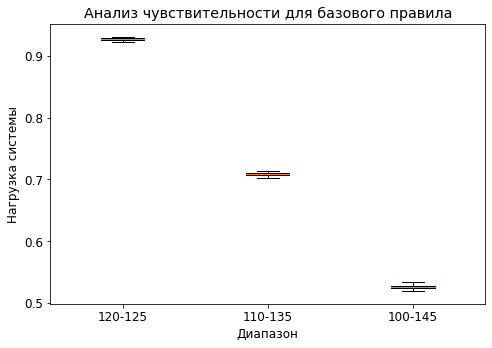

In [710]:
b1 = [i/15180 for i in base_rule_sens1]
b2 = [i/15180 for i in base_rule_sens2]
b3 = [i/15180 for i in base_rule_sens3]
plt.figure(figsize=(7,5))

plt.title('Анализ чувствительности для базового правила')
plt.ylabel('Нагрузка системы')#('Давление, мм.рт.ст')
plt.xlabel('Диапазон')#('Номер измерения')
plt.boxplot([b1, b2, b3], 0, '', labels=['120-125','110-135','100-145'])
plt.tight_layout()
plt.show()

In [659]:
val = [mean(base_rule_sens1)/15180, mean(base_rule_sens2)/15180,mean(base_rule_sens3)/15180]
maxval = [np.quantile(base_rule_sens1, .975)/15180 , np.quantile(base_rule_sens2, .975)/15180 , np.quantile(base_rule_sens3, .95)/15180 ]
minval = [np.quantile(base_rule_sens1, .025)/15180 , np.quantile(base_rule_sens2, .025)/15180 , np.quantile(base_rule_sens3, .05)/15180 ]

In [660]:
print('Base rule', '\n Mean', val, '\n 5 quantil', minval, '\n 95 quantil',maxval)

Base rule 
 Mean [0.9266021080368906, 0.708590909090909, 0.5259802371541502] 
 5 quantil [0.9236116600790514, 0.7025658761528327, 0.5212747035573122] 
 95 quantil [0.9298451910408432, 0.7132131093544137, 0.5303096179183135]


In [661]:
params = ['120-125','110-135','100-145']


In [553]:
max(base_rule_sens1)

14132

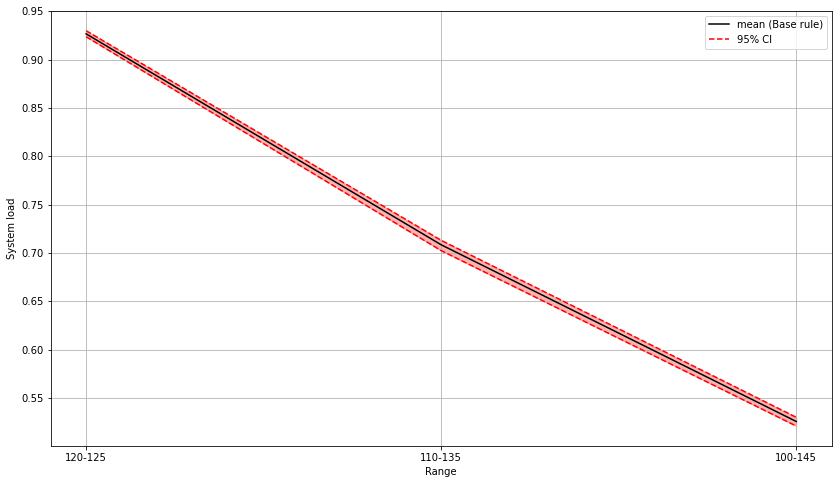

In [662]:
params = ['120-125','110-135','100-145']

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(params, val, 'r-', label='mean (Base rule)', color = 'black')
ax.plot(params, minval, 'r--', label='95% CI')
ax.plot(params, maxval, 'r--')
ax.fill_between(params, maxval, minval, color='r', alpha=0.3)
ax.set(xlabel='Range', ylabel='System load')
plt.legend(), plt.grid();

In [558]:
np.quantile(base_rule_sens1, .95) 

14110.15

In [608]:
# МЕНЯЕМ ДЛЯ ARV ПРАВИЛА СИГМА
def modeling_patient_ARV(id_pat):
    df_patient = df[df['patient_id'] == id_pat]
    male = df_patient['male'].values[0]
    age = df_patient['age'].values[0]
    meansad = df_patient['tonometry_data_systolic_bp'].mean()
    sadvar = df_patient['tonometry_data_systolic_bp'].values

    
    sad = rvData(df_patient['tonometry_data_systolic_bp'])
    meanad = rvData(df_patient['mean_ad'])
    perc_chss = rvData(df_patient['perc_chss'])
    
    #Запись данных сгенерированного давления
    pat_press = [] 
    #Запись данных ошибочных измерений
    err1 = [] 
    err2 =[]
    err3 = []
    
    morning_time=10 #Время утреннего замера давления
    evening_time=20 #Время вечернего замера давления

    #Массив корректных значений давления пациента
    true_press1 = []
    true_press2 = []
    true_press3 = []
    #Запись данных ARV
    arv_pat1 = []
    arv_pat2 = []
    arv_pat3 = []
    #Количество дней
    days = 30
    N = 5

    # какие измерения будут пропущены: 1 - пропуск, 0 - нет
#     missing_meas_flags = [1 if rd_val < missing_prob else 0 for rd_val in np.random.uniform(0, 1, 2*days)]
#     gen = make_generator(missing_meas_flags)
    
    #Начало моделирования
    env = simpy.Environment()
    class Patient:
        def __init__(self, env):
            self.env = env
            self.take_measure = env.event()
            self.pat_answ = [env.process(self.patients())]
            self.time_proc = env.process(self.timemeasure())
            self.pat_error = [env.process(self.error_message())]
            self.measure_done = env.event()
        

        def timemeasure(self):
            while True:
                self.take_measure.succeed()
                self.take_measure = self.env.event()
                yield self.env.timeout(24)

        def patients(self):
            while True:
                yield self.take_measure
                yield self.env.timeout(morning_time)
                syst_ad = sad.rvs()
                dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                while dias_ad >= syst_ad:
                    dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                #if not next(gen): # !!! добавила
                pat_press.append([int(syst_ad),int(dias_ad), int(max_chss_calc(male, age)*perc_chss.rvs())])
                self.measure_done.succeed()
                self.measure_done = self.env.event()

                yield self.env.timeout(evening_time-morning_time)
                syst_ad = sad.rvs()
                dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                while dias_ad >= syst_ad:
                    dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                #if not next(gen): # !!! добавила
                pat_press.append([int(syst_ad),int(dias_ad), int(max_chss_calc(male, age)*perc_chss.rvs())])
                self.measure_done.succeed()
                self.measure_done = self.env.event()

        def error_message(self):
#             global pat_press, true_press, true_press_old_rule,true_press_mean,\
#             err,err_old_rule,err_mean, arv_pat
            while True:
                yield self.measure_done
#                 if len(len_pat_press) != len(pat_press): # сгенерировано новое измерение !!!!
#                         for i in range(len(pat_press)-len(len_pat_press)):
#                             len_pat_press.append(1) # !!! сравняем длину массивов

# Проверка по правилу на основе ВАД               
                # Получение первого измерения
                if len(pat_press) <= N :
                    true_press1.append(pat_press[-1])
                    arv_pat1.append(arv(true_press1, pat_press)[-1])
                    err1.append(0)
                # проверяю вхождения в доверительный интервал
                elif (abs(pat_press[-1][0] - true_press1[-1][0]) <= (arv_pat1[-1] + 2*((np.var(arv_pat1))**(1/2)))):
                    arv_pat1.append(arv(true_press1, pat_press)[-1])
                    true_press1.append(pat_press[-1])
                    err1.append(0)
                else: 
                    err1.append(1)
                    
# Проверка по правилу на основе ВАД               
                # Получение первого измерения
                if len(pat_press) <= N :
                    true_press2.append(pat_press[-1])
                    arv_pat2.append(arv(true_press2, pat_press)[-1])
                    err2.append(0)
                # проверяю вхождения в доверительный интервал
                elif (abs(pat_press[-1][0] - true_press2[-1][0]) <= (arv_pat2[-1] + 3*((np.var(arv_pat2))**(1/2)))):
                    arv_pat2.append(arv(true_press2, pat_press)[-1])
                    true_press2.append(pat_press[-1])
                    err2.append(0)
                else: 
                    err2.append(1)
                    
# Проверка по правилу на основе ВАД               
                # Получение первого измерения
                if len(pat_press) <= N :
                    true_press3.append(pat_press[-1])
                    arv_pat3.append(arv(true_press3, pat_press)[-1])
                    err3.append(0)
                # проверяю вхождения в доверительный интервал
                elif (abs(pat_press[-1][0] - true_press3[-1][0]) <= (arv_pat3[-1] + 4*((np.var(arv_pat3))**(1/2)))):
                    arv_pat3.append(arv(true_press3, pat_press)[-1])
                    true_press3.append(pat_press[-1])
                    err3.append(0)
                else: 
                    err3.append(1) 
                    
    pats = Patient(env)
    env.run(days*24)
    env.now

    return err1, err2, err3


In [604]:
yy = modeling_patient_ARV(2873)


In [607]:
sum(yy[2])

15

In [609]:
def modeling(list_pat):
    result = []
    for i in list_pat:
        result.append(modeling_patient_ARV(i))
    return result

In [610]:
ARV_rule_sens = []
start_time = time.time()
res_arv_sens = joblib.Parallel(n_jobs=-1)(
                    joblib.delayed(modeling)(workid)
                    for i_run in range(100))

print("--- %s seconds ---" % (time.time() - start_time))
ARV_rule_sens.extend(res_arv_sens)

--- 3713.2125170230865 seconds ---


In [611]:
sum_ARV = []

for i in ARV_rule_sens: # перебираем по 100 запускам
    load1 = []
    load2 = []
    load3 = []  
    sum1 = 0
    sum2 = 0
    sum3 = 0

    for j in i: # перебираем по 126 пациентам
        sum1 += sum(j[0])
        sum2 += sum(j[1])
        sum3 += sum(j[2])
     
    load1.append(sum1)
    load2.append(sum2)
    load3.append(sum3)
    sum_ARV.append([load1,load2,load3]) 

In [612]:
sum_ARV

[[[5559], [4200], [3034]],
 [[5624], [4228], [3087]],
 [[5508], [4087], [2968]],
 [[5721], [4378], [3220]],
 [[5561], [4099], [3041]],
 [[5737], [4335], [3186]],
 [[5623], [4250], [3150]],
 [[5544], [4200], [3152]],
 [[5774], [4396], [3291]],
 [[5651], [4218], [3177]],
 [[5545], [4289], [3256]],
 [[5587], [4397], [3323]],
 [[5675], [4247], [3123]],
 [[5658], [4170], [2991]],
 [[5584], [4242], [3079]],
 [[5611], [4208], [3259]],
 [[5767], [4575], [3480]],
 [[5648], [4292], [3196]],
 [[5640], [4178], [3118]],
 [[5491], [4121], [2984]],
 [[5905], [4658], [3430]],
 [[5522], [4112], [3018]],
 [[5589], [4244], [3100]],
 [[5495], [4307], [3208]],
 [[5689], [4409], [3330]],
 [[5478], [4057], [2969]],
 [[5428], [4233], [3176]],
 [[6100], [4717], [3393]],
 [[5625], [4172], [3214]],
 [[5687], [4197], [3236]],
 [[5804], [4259], [3167]],
 [[5568], [4264], [3266]],
 [[5571], [4204], [3044]],
 [[5206], [4043], [2899]],
 [[5307], [3936], [2801]],
 [[5912], [4516], [3308]],
 [[5571], [4192], [3106]],
 

In [613]:
arv_rule_sens1 = []
arv_rule_sens2 = []
arv_rule_sens3 = []

for i in sum_ARV:
    arv_rule_sens1.append(i[0][0])
    arv_rule_sens2.append(i[1][0])
    arv_rule_sens3.append(i[2][0])

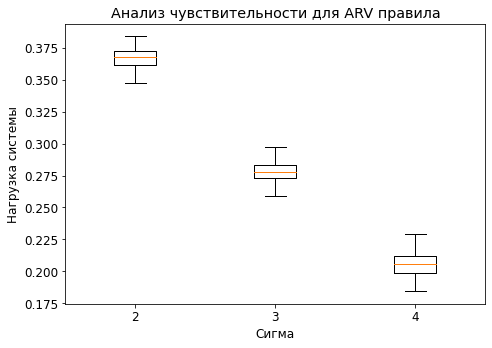

In [709]:
a1 = [i/15180 for i in arv_rule_sens1]
a2 = [i/15180 for i in arv_rule_sens2]
a3 = [i/15180 for i in arv_rule_sens3]
plt.figure(figsize=(7,5))

plt.title('Анализ чувствительности для ARV правила')
plt.ylabel('Нагрузка системы')#('Давление, мм.рт.ст')
plt.xlabel('Сигма')#('Номер измерения')
plt.boxplot([a1, a2, a3], 0, '', labels=['2','3','4'])
plt.tight_layout()
plt.show()

In [663]:
val = [mean(arv_rule_sens1)/15180, mean(arv_rule_sens2)/15180,mean(arv_rule_sens3)/15180]
maxval = [np.quantile(arv_rule_sens1, .975)/15180 , np.quantile(arv_rule_sens2, .975)/15180 , np.quantile(arv_rule_sens3, .975)/15180 ]
minval = [np.quantile(arv_rule_sens1, .025)/15180 , np.quantile(arv_rule_sens2, .025)/15180 , np.quantile(arv_rule_sens3, .025)/15180 ]

In [664]:
print('ARV-based rule', '\n Mean', val, '\n 5 quantil', minval, '\n 95 quantil',maxval)

ARV-based rule 
 Mean [0.36765942028985504, 0.2786264822134387, 0.20585111989459817] 
 5 quantil [0.3485770750988142, 0.26119729907773387, 0.18949604743083004] 
 95 quantil [0.38662055335968376, 0.2995372200263504, 0.22479743083003947]


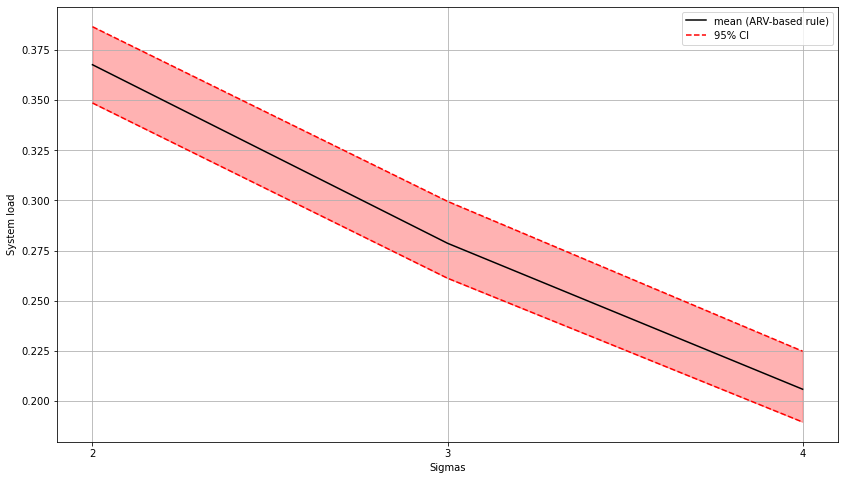

In [665]:
params = ['2','3','4']

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(params, val, 'r-', label='mean (ARV-based rule)', color = 'black')
ax.plot(params, minval, 'r--', label='95% CI')
ax.plot(params, maxval, 'r--')
ax.fill_between(params, maxval, minval, color='r', alpha=0.3)
ax.set(xlabel='Sigmas', ylabel='System load')
plt.legend(), plt.grid();

In [626]:
# МЕНЯЕМ ДЛЯ MEAN ПРАВИЛА СИГМА
def modeling_patient_mean(id_pat):
    df_patient = df[df['patient_id'] == id_pat]
    male = df_patient['male'].values[0]
    age = df_patient['age'].values[0]
    meansad = df_patient['tonometry_data_systolic_bp'].mean()
    sadvar = df_patient['tonometry_data_systolic_bp'].values

    
    sad = rvData(df_patient['tonometry_data_systolic_bp'])
    meanad = rvData(df_patient['mean_ad'])
    perc_chss = rvData(df_patient['perc_chss'])
    
    #Запись данных сгенерированного давления
    pat_press = [] 
    #Запись данных ошибочных измерений
    err1 = [] 
    err2 =[]
    err3 = []
    
    morning_time=10 #Время утреннего замера давления
    evening_time=20 #Время вечернего замера давления

    #Массив корректных значений давления пациента
    true_press1 = []
    true_press2 = []
    true_press3 = []
    #Запись данных ARV
    arv_pat1 = []
    arv_pat2 = []
    arv_pat3 = []
    #Количество дней
    days = 30
    N = 5

    # какие измерения будут пропущены: 1 - пропуск, 0 - нет
#     missing_meas_flags = [1 if rd_val < missing_prob else 0 for rd_val in np.random.uniform(0, 1, 2*days)]
#     gen = make_generator(missing_meas_flags)
    
    #Начало моделирования
    env = simpy.Environment()
    class Patient:
        def __init__(self, env):
            self.env = env
            self.take_measure = env.event()
            self.pat_answ = [env.process(self.patients())]
            self.time_proc = env.process(self.timemeasure())
            self.pat_error = [env.process(self.error_message())]
            self.measure_done = env.event()
        

        def timemeasure(self):
            while True:
                self.take_measure.succeed()
                self.take_measure = self.env.event()
                yield self.env.timeout(24)

        def patients(self):
            while True:
                yield self.take_measure
                yield self.env.timeout(morning_time)
                syst_ad = sad.rvs()
                dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                while dias_ad >= syst_ad:
                    dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                #if not next(gen): # !!! добавила
                pat_press.append([int(syst_ad),int(dias_ad), int(max_chss_calc(male, age)*perc_chss.rvs())])
                self.measure_done.succeed()
                self.measure_done = self.env.event()

                yield self.env.timeout(evening_time-morning_time)
                syst_ad = sad.rvs()
                dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                while dias_ad >= syst_ad:
                    dias_ad = diast_ad_calc(syst_ad, meanad.rvs())
                #if not next(gen): # !!! добавила
                pat_press.append([int(syst_ad),int(dias_ad), int(max_chss_calc(male, age)*perc_chss.rvs())])
                self.measure_done.succeed()
                self.measure_done = self.env.event()

        def error_message(self):
#             global pat_press, true_press, true_press_old_rule,true_press_mean,\
#             err,err_old_rule,err_mean, arv_pat
            while True:
                yield self.measure_done
#                 if len(len_pat_press) != len(pat_press): # сгенерировано новое измерение !!!!
#                         for i in range(len(pat_press)-len(len_pat_press)):
#                             len_pat_press.append(1) # !!! сравняем длину массивов

 # Проверка на основе среднего значения давления
                if len(pat_press) <= N :
                    true_press1.append(pat_press[-1])
                    err1.append(0)
                elif (abs(pat_press[-1][0] - meansad) <= 1*(np.var(sadvar)**(1/2))):
                    true_press1.append(pat_press[-1])
                    err1.append(0)
                else: 
                    err1.append(1)   
                    
 # Проверка на основе среднего значения давления
                if len(pat_press) <= N :
                    true_press2.append(pat_press[-1])
                    err2.append(0)
                elif (abs(pat_press[-1][0] - meansad) <= 2*(np.var(sadvar)**(1/2))):
                    true_press2.append(pat_press[-1])
                    err2.append(0)
                else: 
                    err2.append(1)   
                    
 # Проверка на основе среднего значения давления
                if len(pat_press) <= N :
                    true_press3.append(pat_press[-1])
                    err3.append(0)
                elif (abs(pat_press[-1][0] - meansad) <= 3*(np.var(sadvar)**(1/2))):
                    true_press3.append(pat_press[-1])
                    err3.append(0)
                else: 
                    err3.append(1)   
                    
    pats = Patient(env)
    env.run(days*24)
    env.now

    return err1, err2, err3


In [627]:
def modeling(list_pat):
    result = []
    for i in list_pat:
        result.append(modeling_patient_mean(i))
    return result

In [628]:
mean_rule_sens = []
start_time = time.time()
res_mean_sens = joblib.Parallel(n_jobs=-1)(
                    joblib.delayed(modeling)(workid)
                    for i_run in range(100))

print("--- %s seconds ---" % (time.time() - start_time))
mean_rule_sens.extend(res_mean_sens)

--- 3711.736229658127 seconds ---


In [629]:
sum_mean = []

for i in mean_rule_sens: # перебираем по 100 запускам
    load1 = []
    load2 = []
    load3 = []  
    sum1 = 0
    sum2 = 0
    sum3 = 0

    for j in i: # перебираем по 126 пациентам
        sum1 += sum(j[0])
        sum2 += sum(j[1])
        sum3 += sum(j[2])
     
    load1.append(sum1)
    load2.append(sum2)
    load3.append(sum3)
    sum_mean.append([load1,load2,load3]) 

In [630]:
mean_rule_sens1 = []
mean_rule_sens2 = []
mean_rule_sens3 = []

for i in sum_mean:
    mean_rule_sens1.append(i[0][0])
    mean_rule_sens2.append(i[1][0])
    mean_rule_sens3.append(i[2][0])

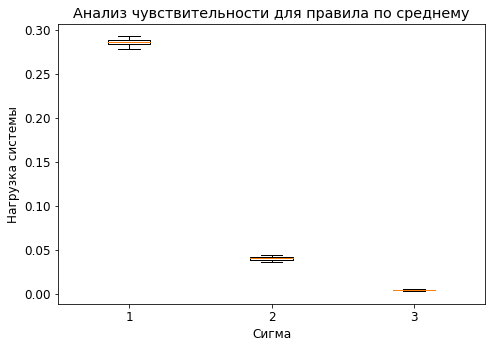

In [708]:
m1 = [i/15180 for i in mean_rule_sens1]
m2 = [i/15180 for i in mean_rule_sens2]
m3 = [i/15180 for i in mean_rule_sens3]
plt.figure(figsize=(7,5))

plt.title('Анализ чувствительности для правила по среднему')
plt.ylabel('Нагрузка системы')#('Давление, мм.рт.ст')
plt.xlabel('Сигма')#('Номер измерения')
plt.boxplot([m1, m2, m3], 0, '', labels=['1','2','3'])
plt.tight_layout()
plt.show()

In [666]:
val = [mean(mean_rule_sens1)/15180, mean(mean_rule_sens2)/15180,mean(mean_rule_sens3)/15180]
maxval = [np.quantile(mean_rule_sens1, .975)/15180 , np.quantile(mean_rule_sens2, .975)/15180 , np.quantile(mean_rule_sens3, .975)/15180 ]
minval = [np.quantile(mean_rule_sens1, .025)/15180 , np.quantile(mean_rule_sens2, .025)/15180 , np.quantile(mean_rule_sens3, .025)/15180 ]

In [667]:
print('Mean-based rule', '\n Mean', val, '\n 5 quantil', minval, '\n 95 quantil',maxval)

Mean-based rule 
 Mean [0.2857674571805007, 0.03997957839262187, 0.00441897233201581] 
 5 quantil [0.27991930171278, 0.036987812911725954, 0.0033909749670619233] 
 95 quantil [0.2917226613965745, 0.04298913043478261, 0.005599472990777339]


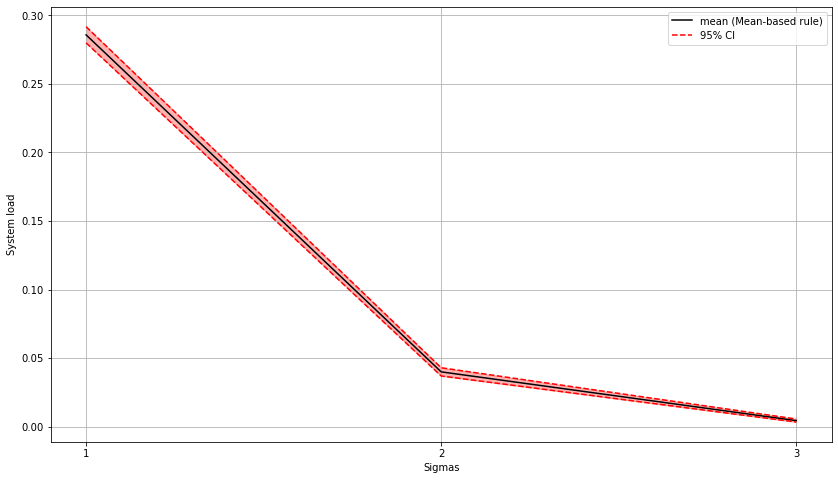

In [668]:
params = ['1','2','3']

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(params, val, 'r-', label='mean (Mean-based rule)', color = 'black')
ax.plot(params, minval, 'r--', label='95% CI')
ax.plot(params, maxval, 'r--')
ax.fill_between(params, maxval, minval, color='r', alpha=0.3)
ax.set(xlabel='Sigmas', ylabel='System load')
plt.legend(), plt.grid();